In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
import matplotlib.dates as mdates
import missingno as msno


In [2]:
df_may = pd.read_csv("apartments_pl_2024_05.csv")
df_june = pd.read_csv("apartments_pl_2024_06.csv")

df = pd.concat([df_may, df_june])
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,...,0.335,condominium,brick,premium,no,yes,yes,no,no,1199999
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,400000
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4.0,4.0,NaN,53.443096,14.561348,...,0.229,udział,brick,premium,yes,yes,no,no,no,1169000
3,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,...,0.178,condominium,brick,premium,yes,yes,yes,yes,yes,799000
4,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,0.304,condominium,brick,NaN,no,yes,no,no,yes,599000


## EKSİK DEĞER GRAFİĞİ

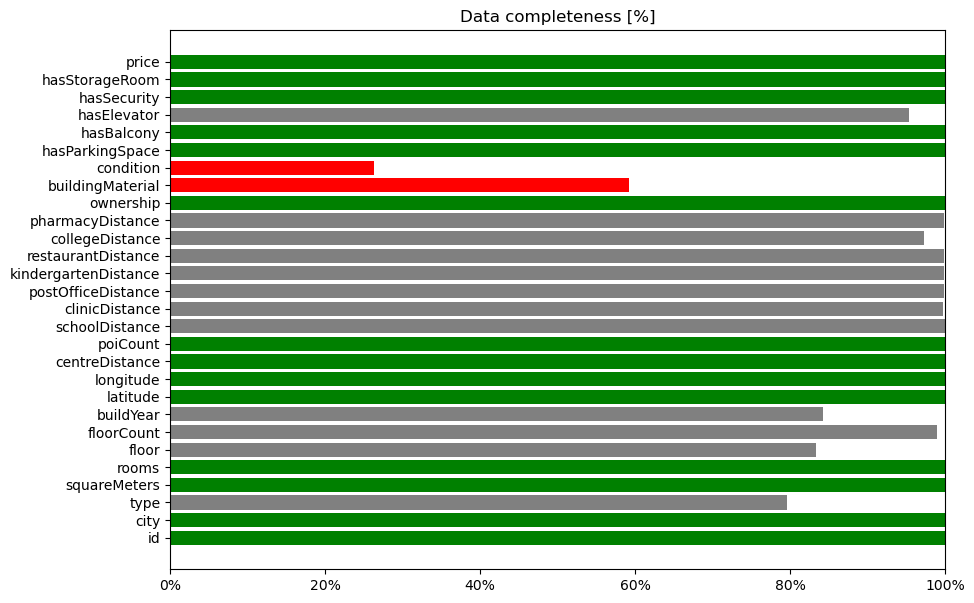

In [12]:
allCols = df.columns
nonEmpty = []
barColors = []
for colName in allCols:
  completeness = 1-len(df[df[colName].isnull()])/len(df)
  nonEmpty.append(completeness)
  if(completeness == 1):
     barColors.append('green')
  elif completeness < 0.75:
    barColors.append('red')
  else:
     barColors.append('grey')

def percent_formatter(x, pos):
    return str(round(x*100)) + "%"

fig, axs = plt.subplots(figsize=(10, 7))
axs.set_title("Data completeness [%]")
axs.barh(allCols, nonEmpty, color=barColors)
axs.set_xlim(0, 1)
axs.xaxis.set_major_formatter(percent_formatter)
plt.show()

## Sayısal Değişkenlerin İstatistik Bilgileri

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,41732.0,57.189625,20.701533,25.000000,42.977500,53.000000,66.70000,1.500000e+02
rooms,41732.0,2.629493,0.893307,1.000000,2.000000,3.000000,3.00000,6.000000e+00
floor,34759.0,3.387928,2.589406,1.000000,2.000000,3.000000,4.00000,2.900000e+01
floorCount,41311.0,5.450703,3.386666,1.000000,3.000000,4.000000,7.00000,2.900000e+01
buildYear,35153.0,1986.971980,32.835434,1850.000000,1969.000000,1994.000000,2016.00000,2.024000e+03
latitude,41732.0,51.998319,1.309950,49.982066,51.104737,52.194157,52.38394,5.458287e+01
longitude,41732.0,19.476479,1.769591,14.447127,18.532420,19.909450,20.98880,2.320887e+01
centreDistance,41732.0,4.437692,2.794289,0.020000,2.120000,4.130000,6.25000,1.651000e+01
poiCount,41732.0,20.547206,23.953040,0.000000,7.000000,14.000000,24.00000,2.120000e+02
schoolDistance,41712.0,0.410554,0.450224,0.005000,0.178000,0.289000,0.46400,4.920000e+00


## EMLAK FİYATLARININ DAĞILIMI

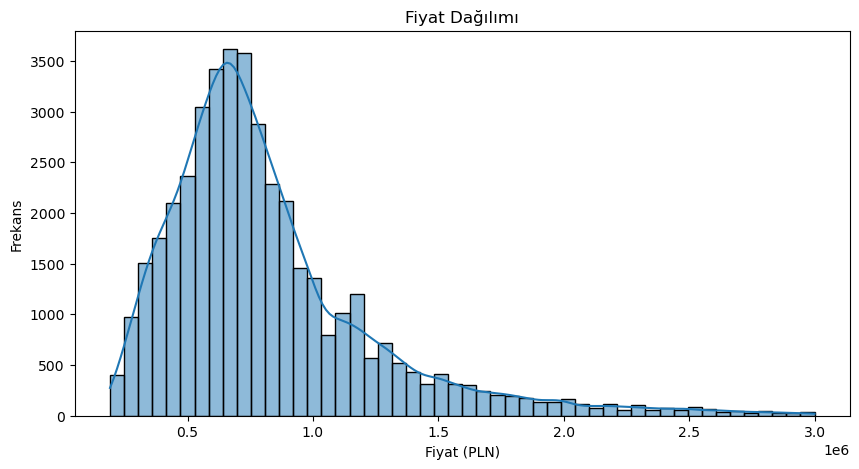

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat (PLN)")
plt.ylabel("Frekans")
plt.show()


## FİYAT  -  ŞEHİR ANALİZİ

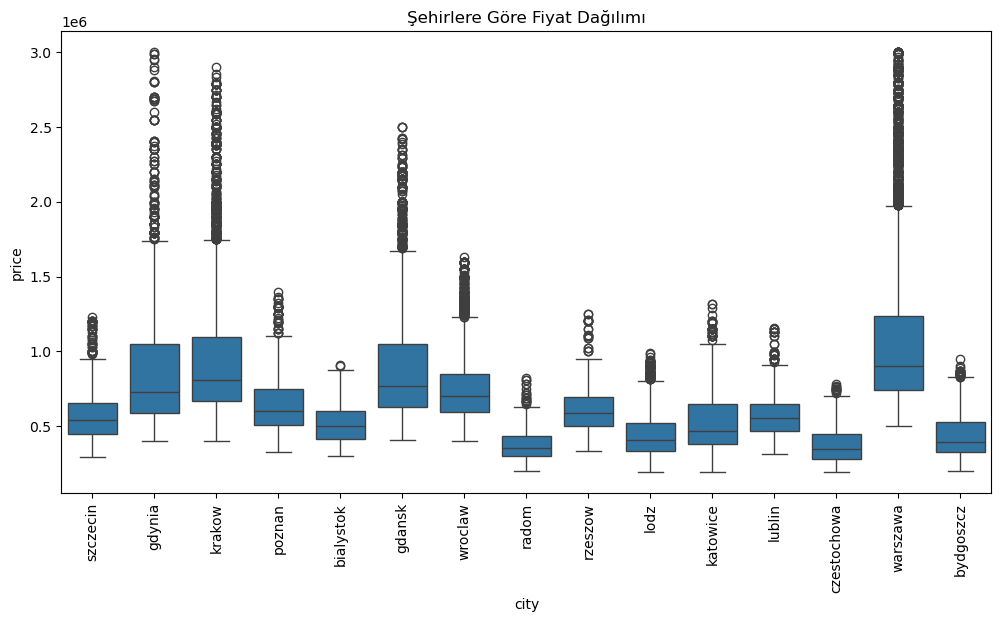

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Şehirlere Göre Fiyat Dağılımı")
plt.show()


## Şehirlere Göre Güvenlik Bilgisine Bağlı Fiyat Değişimi

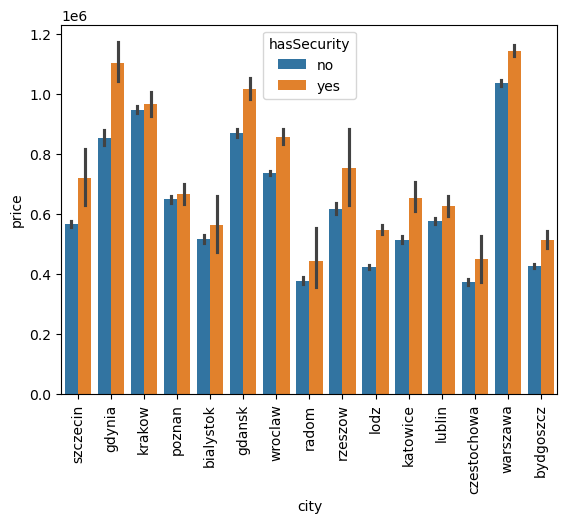

In [19]:
sns.barplot(x = "city", y = "price", hue = "hasSecurity", data = df);
plt.xticks(rotation=90) 
plt.show()

## MERKEZE UZAKLIK VE FİYAT DAĞILIMI

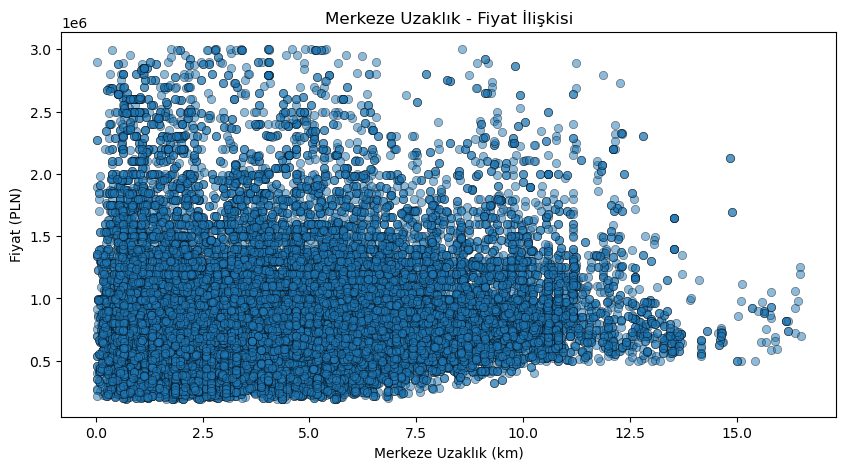

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='centreDistance',
                y='price',
                data=df,
                alpha=0.5,
                edgecolor="black" 
               )
plt.title("Merkeze Uzaklık - Fiyat İlişkisi")
plt.xlabel("Merkeze Uzaklık (km)")
plt.ylabel("Fiyat (PLN)")
plt.show()


## ISI HARİTASI ÜZERİNDE KONUM BAZLI FİYAT ANALİZİ

In [16]:
import folium
from folium.plugins import HeatMap

# Latitude ve Longitude içeren satırları filtrele
df_map = df[['latitude', 'longitude', 'price']].dropna()

# Harita oluştur
m = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()], zoom_start=10)

# Isı haritası ekle
heat_data = list(zip(df_map['latitude'], df_map['longitude'], df_map['price']))
HeatMap(heat_data, radius=10).add_to(m)

# Haritayı göster
m


## METREKARE - FİYAT DAĞILIMI

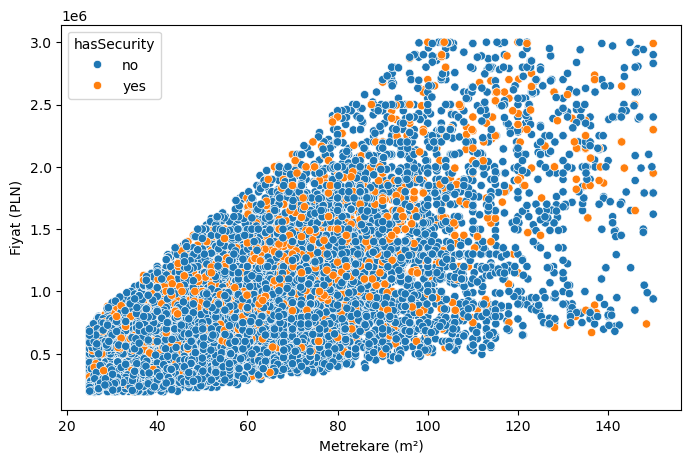

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['squareMeters'], y=df['price'], hue = df['hasSecurity'], alpha=1.0)
plt.xlabel("Metrekare (m²)")
plt.ylabel("Fiyat (PLN)")
plt.show()


## ODA SAYISINA GÖRE FİYAT BİLGİSİ

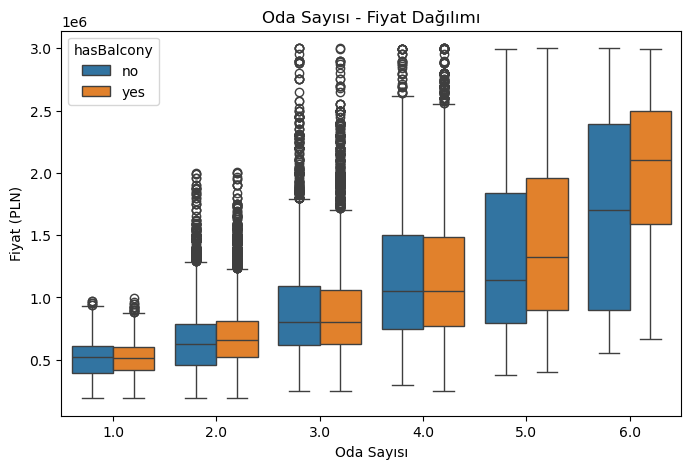

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['rooms'], y=df['price'],hue = df['hasBalcony'])
plt.title("Oda Sayısı - Fiyat Dağılımı")
plt.xlabel("Oda Sayısı")
plt.ylabel("Fiyat (PLN)")
plt.show()


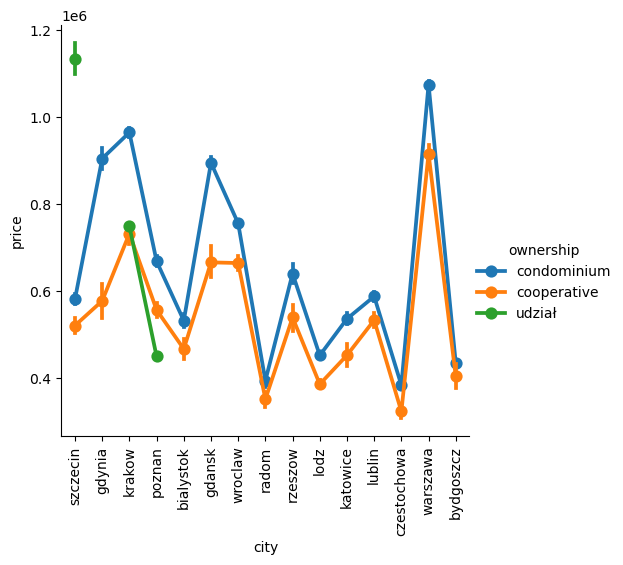

In [17]:
sns.catplot(x = "city", y = "price", hue = "ownership",kind = "point", data = df);
plt.xticks(rotation=90)
plt.show()

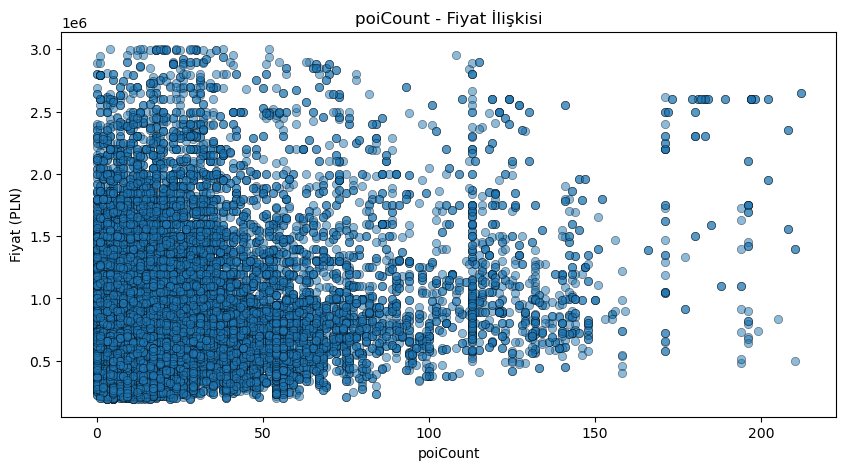

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='poiCount',
                y='price',
                data=df,
                alpha=0.5,
                edgecolor="black" 
               )
plt.title("poiCount - Fiyat İlişkisi")
plt.xlabel("poiCount")
plt.ylabel("Fiyat (PLN)")
plt.show()


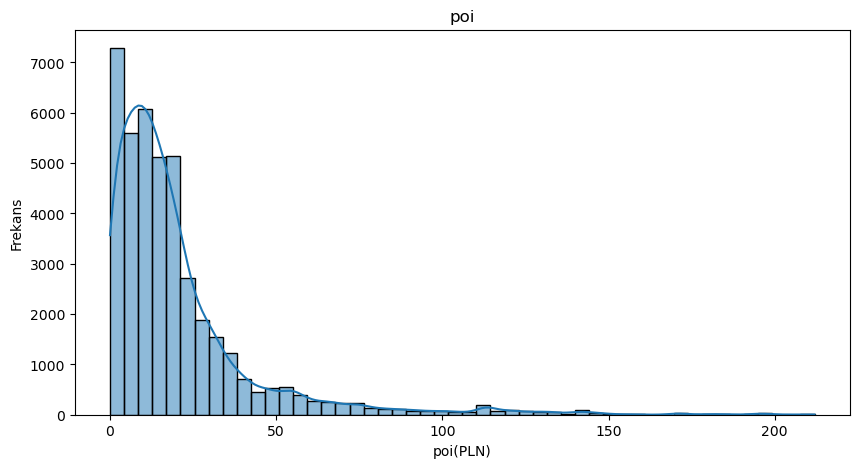

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['poiCount'], bins=50, kde=True)
plt.title("poi")
plt.xlabel("poi(PLN)")
plt.ylabel("Frekans")
plt.show()

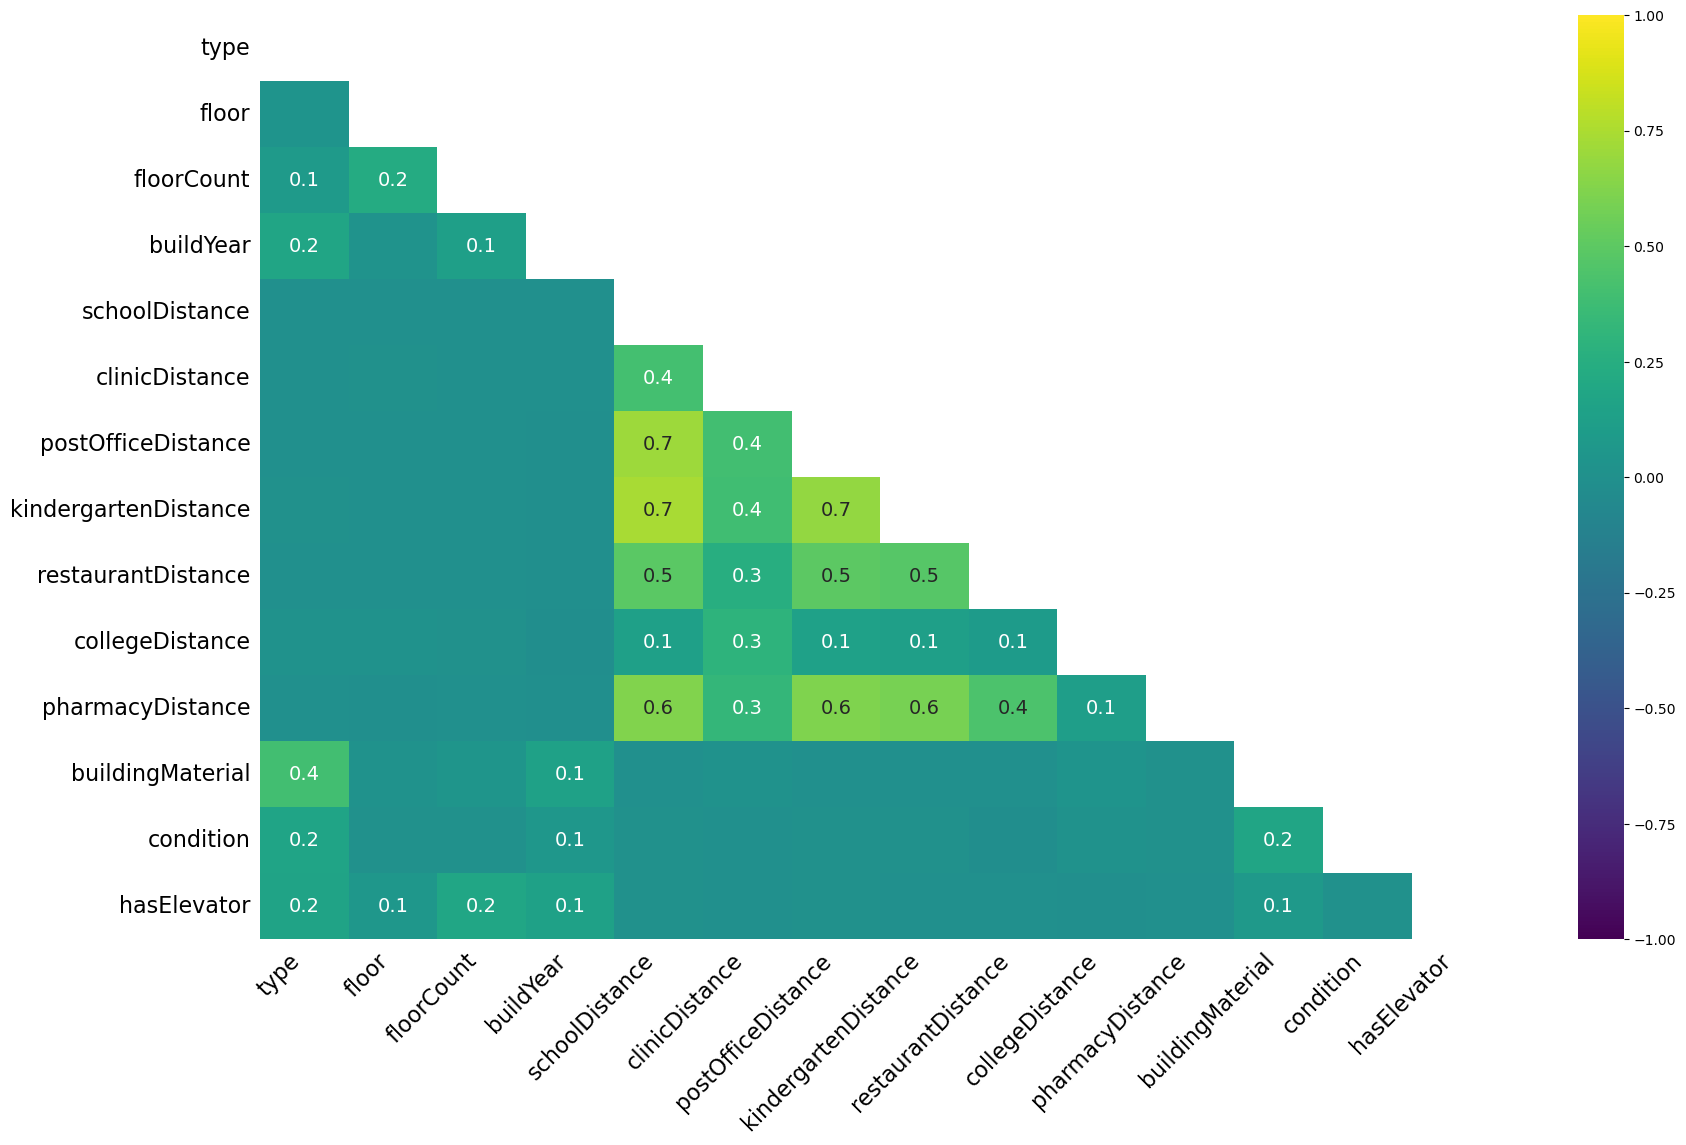

In [5]:
msno.heatmap(df, cmap='viridis')
plt.show()